In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# 1. 导入数据集及数据预处理

In [2]:
df =  pd.read_csv('./data/dataset_wx.csv', index_col='date')
df

oneDayBefore  oneMonthBefore  oneYearBefore  dollorRate  price
date                                                                      
2015-01-01          2.36            2.45            NaN  611.900024   2.49
2015-01-02          2.49            2.42           2.84  611.900024   2.52
2015-01-03          2.52            2.36           2.84  611.900024   2.53
2015-01-04          2.53            2.29           2.88  611.900024   2.25
2015-01-05          2.25            2.36           2.92  612.452795   2.31
2015-01-06          2.31            2.41           2.98  612.550739   2.28
2015-01-07          2.28            2.38           2.60  612.666668   2.24
2015-01-08          2.24            2.45           2.82  612.978421   2.28
2015-01-09          2.28            2.30           2.74  612.965682   2.28
2015-01-10          2.28            2.24           2.83  612.960022   2.33
2015-01-11          2.33            2.32           2.81  612.960022   2.52
2015-01-12          2.52            2.42           2.95  612.404684   2.58
2015-01-13          2.58            2.27           3.12  611.999128   2.39
2015-01-14          2.39            2.34           3.24  612.040556   2.42
2015-01-15          2.42            2.45           3.17  611.938856   2.34
2015-01-16          2.34            2.36           2.86  611.883806   2.44
2015-01-17          2.44            2.31           2.88  611.880005   2.45
2015-01-18          2.45            2.35           2.93  611.880005   2.46
2015-01-19          2.46            2.38           2.92  612.260226   2.52
2015-01-20          2.52            2.26           2.96  612.265224   2.38
2015-01-21          2.38            2.30           2.89  612.603300   2.44
2015-01-22          2.44            2.45           2.87  612.500666   2.52
2015-01-23          2.52            2.27           2.96  613.245935   2.58
2015-01-24          2.58            2.28           3.04  613.419983   2.45
2015-01-25          2.45            2.34           3.02  613.419983   2.53
2015-01-26          2.53            2.34           3.12  613.782421   2.48
2015-01-27          2.48            2.45           3.15  613.663792   2.47
2015-01-28          2.47            2.35           3.07  612.909463   2.50
2015-01-29          2.50            2.35            NaN  613.280699   2.44
2015-01-30          2.44            2.33            NaN  613.654958   2.49
...                  ...             ...            ...         ...    ...
2018-12-02          2.13            2.09           2.24  693.570007   2.19
2018-12-03          2.19            2.11           2.18  694.250200   2.13
2018-12-04          2.13            2.12           2.14  689.708036   2.18
2018-12-05          2.18            2.08           2.20  685.347574   2.14
2018-12-06          2.14            2.10           2.14  685.871363   2.18
2018-12-07          2.18            2.07           2.15  686.607693   2.20
2018-12-08          2.20            2.10           2.11  686.640015   2.30
2018-12-09          2.30            2.05           2.13  686.640015   2.33
2018-12-10          2.33            2.12           2.12  686.911404   2.22
2018-12-11          2.22            1.95           2.10  689.756208   2.22
2018-12-12          2.22            2.01           2.04  690.573417   2.13
2018-12-13          2.13            2.07           2.11  687.939739   2.18
2018-12-14          2.18            2.10           2.10  687.525763   2.20
2018-12-15          2.20            2.12           2.13  687.500000   2.16
2018-12-16          2.16            2.16           2.16  687.500000   2.21
2018-12-17          2.21            2.19           2.07  688.901628   2.20
2018-12-18          2.20            2.24           2.06  688.619122   2.16
2018-12-19          2.16            2.14           2.03  688.680001   2.16
2018-12-20          2.16            2.17           2.05  689.269558   2.13
2018-12-21          2.13            2.17           1.99  688.354253   2.17
2018-12-22          2.17            2

## 1.1 补全数据

In [3]:
df = df.fillna(method='bfill')
df = df.fillna(df.mean())
df

oneDayBefore  oneMonthBefore  oneYearBefore  dollorRate  price
date                                                                      
2015-01-01          2.36        2.450000           2.84  611.900024   2.49
2015-01-02          2.49        2.420000           2.84  611.900024   2.52
2015-01-03          2.52        2.360000           2.84  611.900024   2.53
2015-01-04          2.53        2.290000           2.88  611.900024   2.25
2015-01-05          2.25        2.360000           2.92  612.452795   2.31
2015-01-06          2.31        2.410000           2.98  612.550739   2.28
2015-01-07          2.28        2.380000           2.60  612.666668   2.24
2015-01-08          2.24        2.450000           2.82  612.978421   2.28
2015-01-09          2.28        2.300000           2.74  612.965682   2.28
2015-01-10          2.28        2.240000           2.83  612.960022   2.33
2015-01-11          2.33        2.320000           2.81  612.960022   2.52
2015-01-12          2.52        2.420000           2.95  612.404684   2.58
2015-01-13          2.58        2.270000           3.12  611.999128   2.39
2015-01-14          2.39        2.340000           3.24  612.040556   2.42
2015-01-15          2.42        2.450000           3.17  611.938856   2.34
2015-01-16          2.34        2.360000           2.86  611.883806   2.44
2015-01-17          2.44        2.310000           2.88  611.880005   2.45
2015-01-18          2.45        2.350000           2.93  611.880005   2.46
2015-01-19          2.46        2.380000           2.92  612.260226   2.52
2015-01-20          2.52        2.260000           2.96  612.265224   2.38
2015-01-21          2.38        2.300000           2.89  612.603300   2.44
2015-01-22          2.44        2.450000           2.87  612.500666   2.52
2015-01-23          2.52        2.270000           2.96  613.245935   2.58
2015-01-24          2.58        2.280000           3.04  613.419983   2.45
2015-01-25          2.45        2.340000           3.02  613.419983   2.53
2015-01-26          2.53        2.340000           3.12  613.782421   2.48
2015-01-27          2.48        2.450000           3.15  613.663792   2.47
2015-01-28          2.47        2.350000           3.07  612.909463   2.50
2015-01-29          2.50        2.350000           3.57  613.280699   2.44
2015-01-30          2.44        2.330000           3.57  613.654958   2.49
...                  ...             ...            ...         ...    ...
2018-12-02          2.13        2.090000           2.24  693.570007   2.19
2018-12-03          2.19        2.110000           2.18  694.250200   2.13
2018-12-04          2.13        2.120000           2.14  689.708036   2.18
2018-12-05          2.18        2.080000           2.20  685.347574   2.14
2018-12-06          2.14        2.100000           2.14  685.871363   2.18
2018-12-07          2.18        2.070000           2.15  686.607693   2.20
2018-12-08          2.20        2.100000           2.11  686.640015   2.30
2018-12-09          2.30        2.050000           2.13  686.640015   2.33
2018-12-10          2.33        2.120000           2.12  686.911404   2.22
2018-12-11          2.22        1.950000           2.10  689.756208   2.22
2018-12-12          2.22        2.010000           2.04  690.573417   2.13
2018-12-13          2.13        2.070000           2.11  687.939739   2.18
2018-12-14          2.18        2.100000           2.10  687.525763   2.20
2018-12-15          2.20        2.120000           2.13  687.500000   2.16
2018-12-16          2.16        2.160000           2.16  687.500000   2.21
2018-12-17          2.21        2.190000           2.07  688.901628   2.20
2018-12-18          2.20        2.240000           2.06  688.619122   2.16
2018-12-19          2.16        2.140000           2.03  688.680001   2.16
2018-12-20          2.16        2.170000           2.05  689.269558   2.13
2018-12-21          2.13        2.170000           1.99  688.354253   2.17
2018-12-22          2.17        2.150

## 1.2 拆分数据集

In [4]:
X_data = df.iloc[:,0:-1]
X_data

oneDayBefore  oneMonthBefore  oneYearBefore  dollorRate
date                                                               
2015-01-01          2.36        2.450000           2.84  611.900024
2015-01-02          2.49        2.420000           2.84  611.900024
2015-01-03          2.52        2.360000           2.84  611.900024
2015-01-04          2.53        2.290000           2.88  611.900024
2015-01-05          2.25        2.360000           2.92  612.452795
2015-01-06          2.31        2.410000           2.98  612.550739
2015-01-07          2.28        2.380000           2.60  612.666668
2015-01-08          2.24        2.450000           2.82  612.978421
2015-01-09          2.28        2.300000           2.74  612.965682
2015-01-10          2.28        2.240000           2.83  612.960022
2015-01-11          2.33        2.320000           2.81  612.960022
2015-01-12          2.52        2.420000           2.95  612.404684
2015-01-13          2.58        2.270000           3.12  611.999128
2015-01-14          2.39        2.340000           3.24  612.040556
2015-01-15          2.42        2.450000           3.17  611.938856
2015-01-16          2.34        2.360000           2.86  611.883806
2015-01-17          2.44        2.310000           2.88  611.880005
2015-01-18          2.45        2.350000           2.93  611.880005
2015-01-19          2.46        2.380000           2.92  612.260226
2015-01-20          2.52        2.260000           2.96  612.265224
2015-01-21          2.38        2.300000           2.89  612.603300
2015-01-22          2.44        2.450000           2.87  612.500666
2015-01-23          2.52        2.270000           2.96  613.245935
2015-01-24          2.58        2.280000           3.04  613.419983
2015-01-25          2.45        2.340000           3.02  613.419983
2015-01-26          2.53        2.340000           3.12  613.782421
2015-01-27          2.48        2.450000           3.15  613.663792
2015-01-28          2.47        2.350000           3.07  612.909463
2015-01-29          2.50        2.350000           3.57  613.280699
2015-01-30          2.44        2.330000           3.57  613.654958
...                  ...             ...            ...         ...
2018-12-02          2.13        2.090000           2.24  693.570007
2018-12-03          2.19        2.110000           2.18  694.250200
2018-12-04          2.13        2.120000           2.14  689.708036
2018-12-05          2.18        2.080000           2.20  685.347574
2018-12-06          2.14        2.100000           2.14  685.871363
2018-12-07          2.18        2.070000           2.15  686.607693
2018-12-08          2.20        2.100000           2.11  686.640015
2018-12-09          2.30        2.050000           2.13  686.640015
2018-12-10          2.33        2.120000           2.12  686.911404
2018-12-11          2.22        1.950000           2.10  689.756208
2018-12-12          2.22        2.010000           2.04  690.573417
2018-12-13          2.13        2.070000           2.11  687.939739
2018-12-14          2.18        2.100000           2.10  687.525763
2018-12-15          2.20        2.120000           2.13  687.500000
2018-12-16          2.16        2.160000           2.16  687.500000
2018-12-17          2.21        2.190000           2.07  688.901628
2018-12-18          2.20        2.240000           2.06  688.619122
2018-12-19          2.16        2.140000           2.03  688.680001
2018-12-20          2.16        2.170000           2.05  689.269558
2018-12-21          2.13        2.170000           1.99  688.354253
2018-12-22          2.17        2.150000           1.96  688.250000
2018-12-23          2.14        2.140000           1.94  688.250000
2018-12-24          2.11        2.160000           2.07  689.861642
2018-12-25          2.11        2.170000           2.02  689.293573
2018-12-26          2.16        2.110000           1.98  688.505978
2018-12-27          2.19        2.140000           1.95  688.878754


In [5]:
Y_data = df['price'].values.reshape(-1, 1)
Y_data

array([[2.49],
       [2.52],
       [2.53],
       ...,
       [2.17],
       [2.27],
       [2.18]])

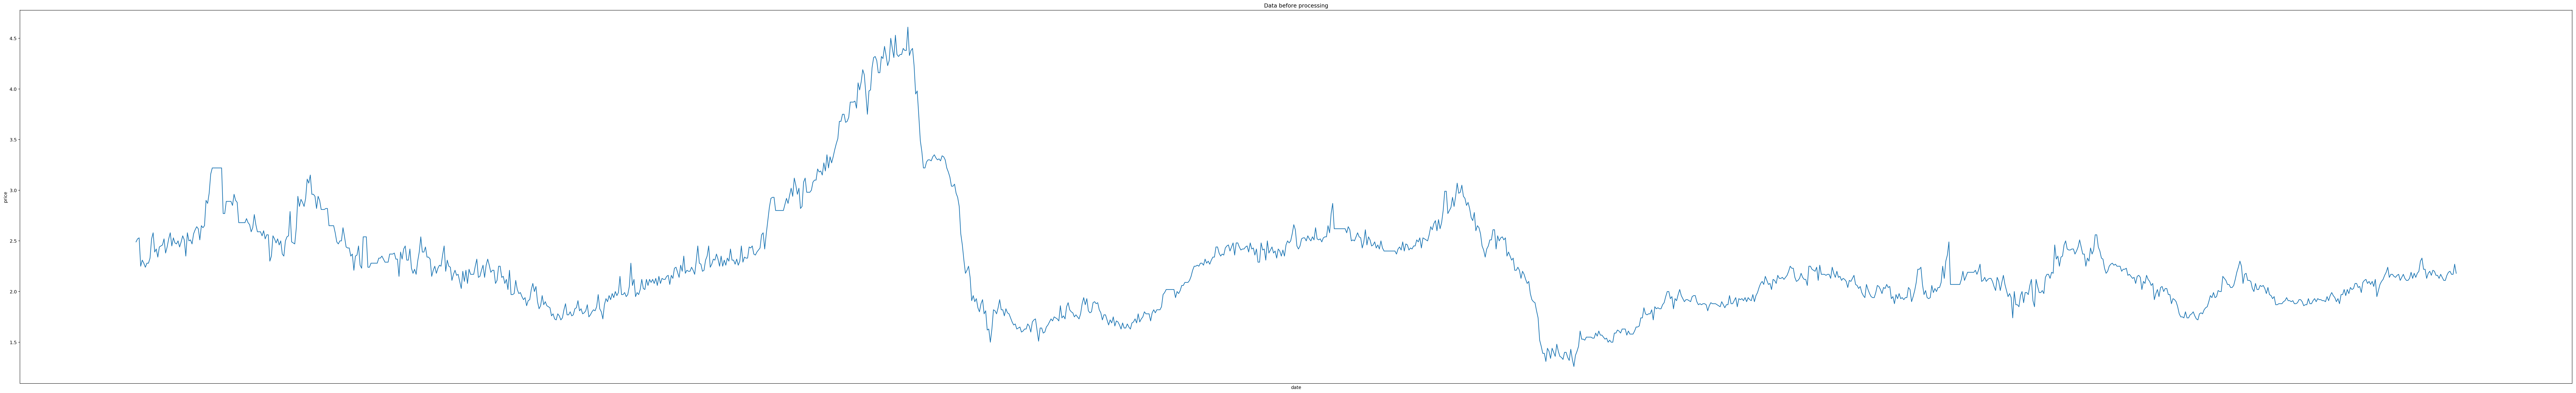

In [6]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 180)
plt.plot(range(len(X_data)), Y_data)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Data before processing')
plt.show()

## 1.3 归一化

In [7]:
scaler_X = preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(X_data)
scaler_X

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler_Y =  preprocessing.StandardScaler(
    copy=True, with_mean=True, with_std=True).fit(Y_data)
scaler_Y

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X = scaler_X.transform(X_data)
X

array([[ 1.81065062e-01,  3.44785263e-01,  8.06775010e-01,
        -1.67916567e+00],
       [ 4.28925741e-01,  2.87678528e-01,  8.06775010e-01,
        -1.67916567e+00],
       [ 4.86124359e-01,  1.73465058e-01,  8.06775010e-01,
        -1.67916567e+00],
       ...,
       [-1.81192852e-01, -2.64353242e-01, -7.37298597e-01,
         1.16430522e+00],
       [-1.81192852e-01, -3.02424398e-01, -6.51516730e-01,
         1.16430522e+00],
       [ 9.46920822e-03, -3.38139797e-15, -5.31422116e-01,
         1.73751834e-14]])

In [10]:
Y = scaler_Y.transform(Y_data)
Y

array([[ 0.4298441 ],
       [ 0.48704079],
       [ 0.50610636],
       ...,
       [-0.18025391],
       [ 0.01040172],
       [-0.16118834]])

In [11]:
X_raw_1 = scaler_X.inverse_transform(X)
X_raw_1

array([[  2.36      ,   2.45      ,   2.84      , 611.90002441],
       [  2.49      ,   2.42      ,   2.84      , 611.90002441],
       [  2.52      ,   2.36      ,   2.84      , 611.90002441],
       ...,
       [  2.17      ,   2.13      ,   1.94      , 686.32000732],
       [  2.17      ,   2.11      ,   1.99      , 686.32000732],
       [  2.27      ,   2.26887324,   2.06      , 655.84753982]])

## 1.4 拆分测试集、训练集

In [12]:
X_train = X[:1342]
y_train = Y[:1342]
X_test = X[1342:]
y_test = Y[1342:]
# X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [13]:
X_train.shape

(1342, 4)

In [14]:
X_test.shape

(150, 4)

In [15]:
y_train.shape

(1342, 1)

In [16]:
y_test.shape

(150, 1)

## 1.5 绘制数据图表

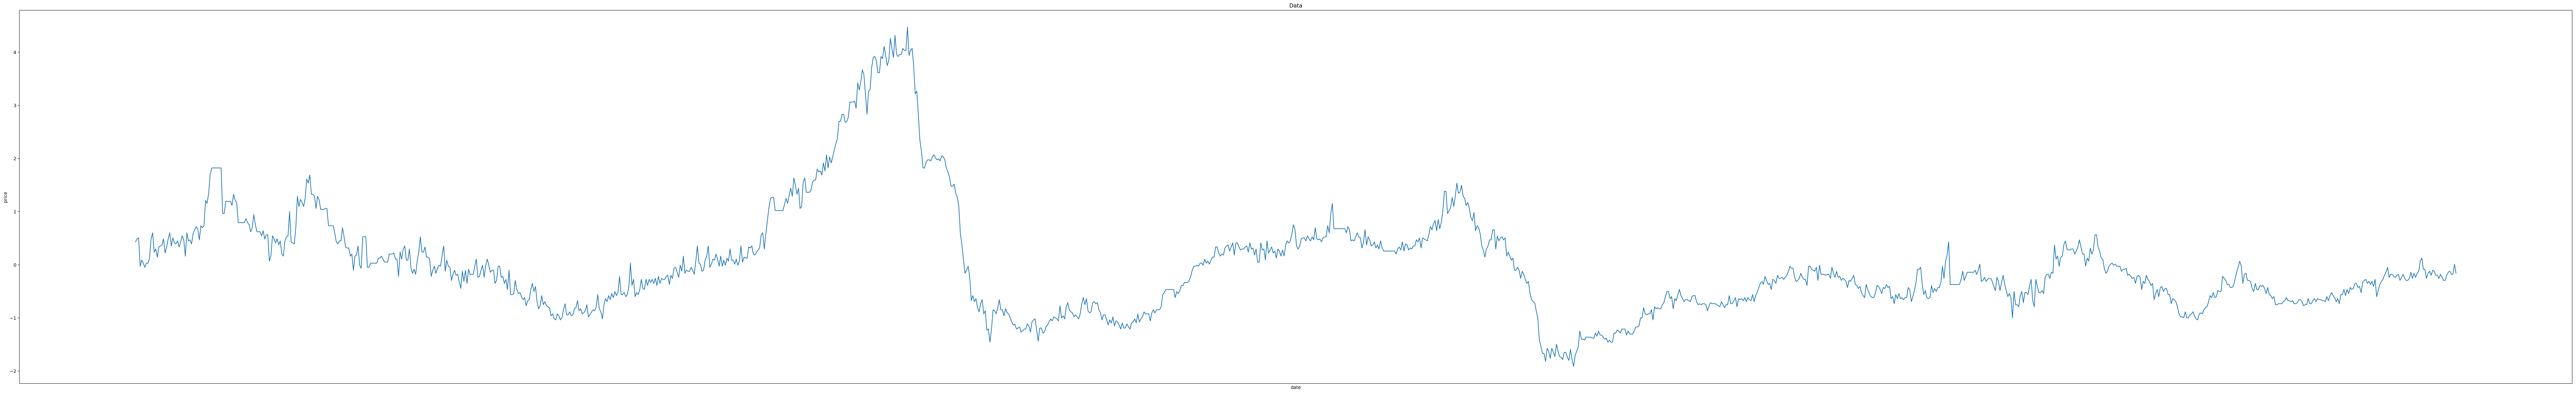

In [17]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 180)
plt.plot(range(len(X)), Y)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Data')
plt.show()

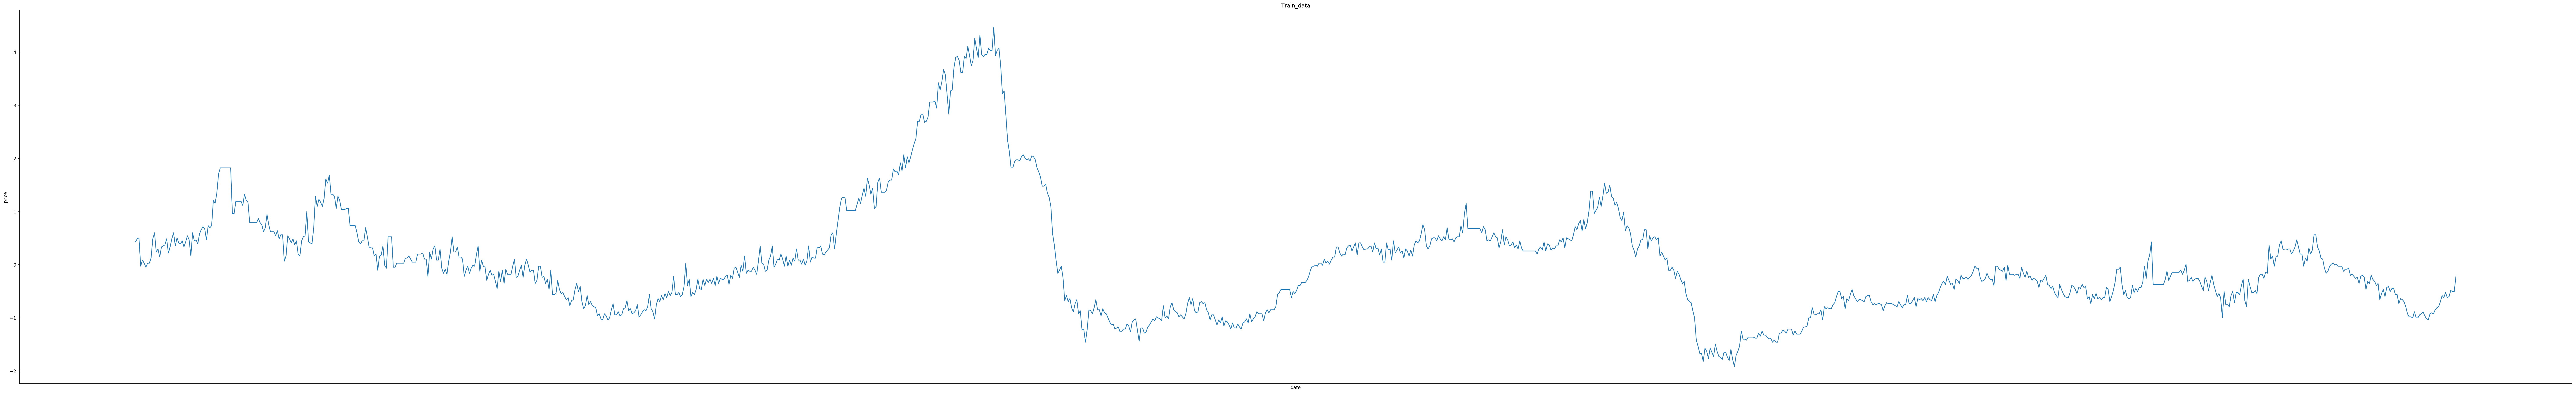

In [18]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 150)
plt.plot(range(len(X_train)), y_train)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Train_data')
plt.show()

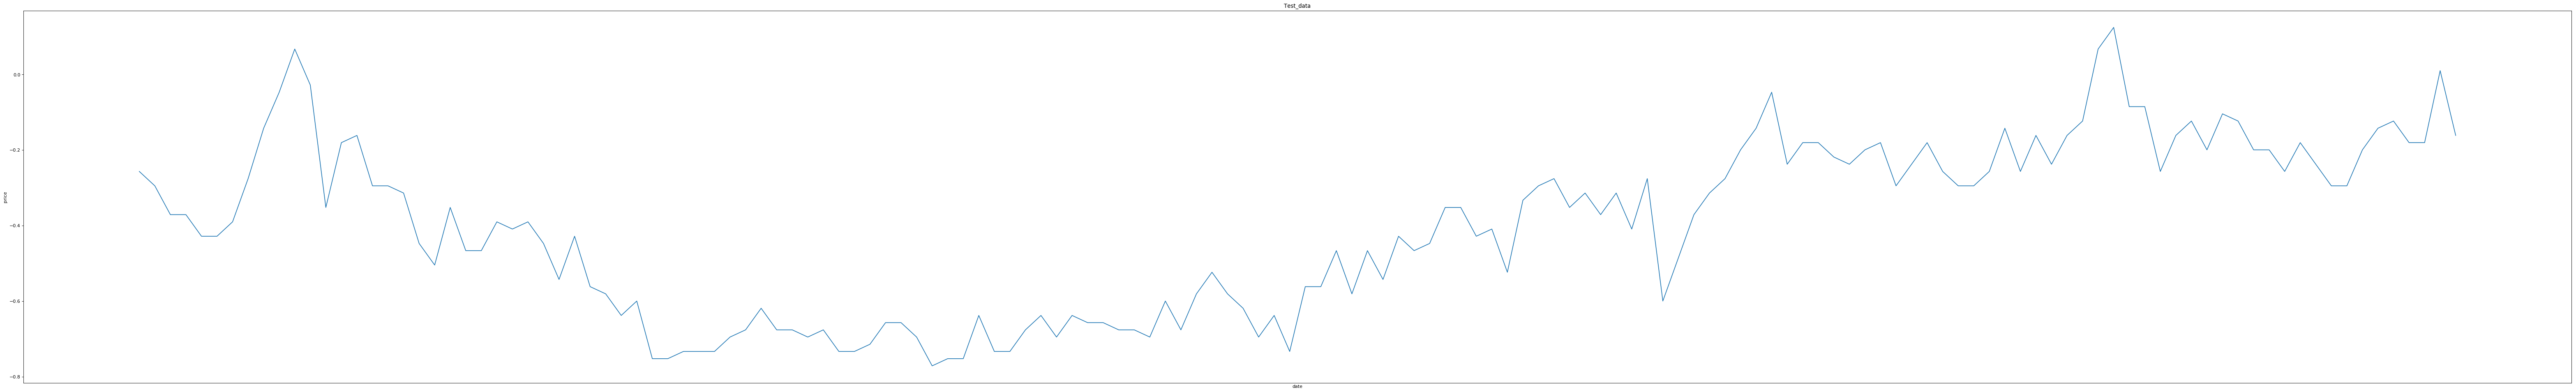

In [20]:
%matplotlib inline
plt.figure(figsize=(100, 15),dpi = 80)
plt.plot(range(len(X_test)), y_test)
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Test_data')
plt.show()

# 2.模型的定义

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping

In [22]:
def build_network_1():
    network = Sequential()
    network.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dense(15, activation='relu'))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

# 3.训练模型

## 3.1 第一个模型

In [23]:
# 超参数
epoch_num = 50

In [24]:
model = build_network_1()
model

In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs=epoch_num,
    shuffle=True,
    batch_size=50,
    verbose=1,
    validation_split=0.1)

Train on 1207 samples, validate on 135 samples
Epoch 1/50
1207/1207 [==============================] - 0s 167us/step - loss: 0.8206 - mean_absolute_error: 0.6491 - mean_squared_error: 0.8206 - val_loss: 0.3164 - val_mean_absolute_error: 0.4893 - val_mean_squared_error: 0.3164
Epoch 2/50
1207/1207 [==============================] - 0s 20us/step - loss: 0.4584 - mean_absolute_error: 0.4836 - mean_squared_error: 0.4584 - val_loss: 0.1994 - val_mean_absolute_error: 0.4018 - val_mean_squared_error: 0.1994
Epoch 3/50
1207/1207 [==============================] - 0s 25us/step - loss: 0.2544 - mean_absolute_error: 0.3681 - mean_squared_error: 0.2544 - val_loss: 0.1283 - val_mean_absolute_error: 0.3143 - val_mean_squared_error: 0.1283
Epoch 4/50
1207/1207 [==============================] - 0s 21us/step - loss: 0.1588 - mean_absolute_error: 0.2962 - mean_squared_error: 0.1588 - val_loss: 0.0905 - val_mean_absolute_error: 0.2488 - val_mean_squared_error: 0.0905
Epoch 5/50
1207/1207 [==============

In [26]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

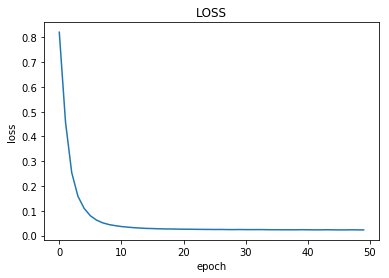

In [27]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

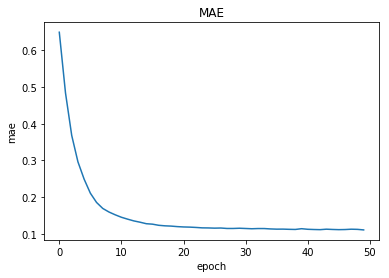

In [28]:
%matplotlib inline
plt.plot(range(len(mae_history)), mae_history)
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('MAE')
plt.show()

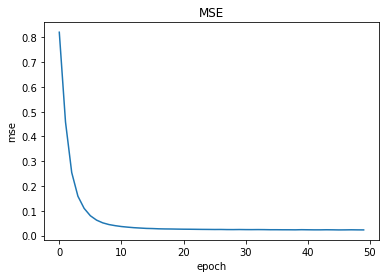

In [29]:
%matplotlib inline
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('MSE')
plt.show()

In [30]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

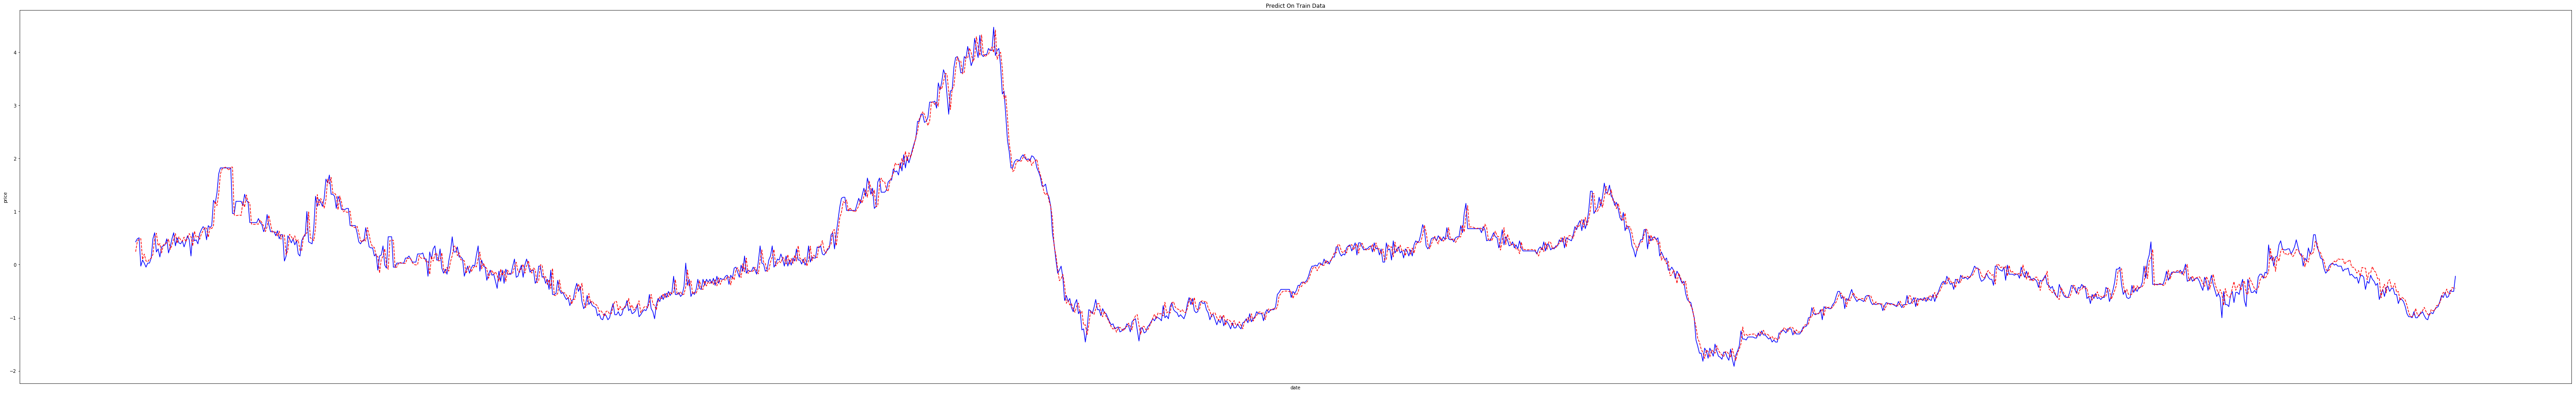

In [31]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

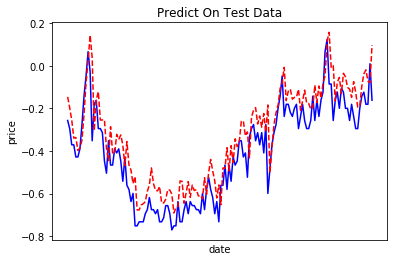

In [33]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

### 尝试其他模型

## 3.2 缩小神经网络

In [149]:
def build_network_2():
    network = Sequential()
    network.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dense(8, activation='relu'))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [150]:
model = build_network_2()

In [151]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
best_weights_filepath = './model_data/nn2_best_weights.hdf5'
#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')
save_bestModel =ModelCheckpoint(best_weights_filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='auto')

In [152]:
history= model.fit(X_train, y_train, epochs=epoch_num, batch_size=50,verbose=1, validation_split=0.1,shuffle=True,callbacks=[save_bestModel])

Train on 1207 samples, validate on 135 samples
Epoch 1/50
1207/1207 [==============================] - 1s 428us/step - loss: 1.1410 - mean_absolute_error: 0.8691 - mean_squared_error: 1.1410 - val_loss: 0.5775 - val_mean_absolute_error: 0.6685 - val_mean_squared_error: 0.5775

Epoch 00001: val_loss improved from inf to 0.57748, saving model to ./model_data/nn2_best_weights.hdf5
Epoch 2/50
1207/1207 [==============================] - 0s 22us/step - loss: 0.8134 - mean_absolute_error: 0.7175 - mean_squared_error: 0.8134 - val_loss: 0.4146 - val_mean_absolute_error: 0.5634 - val_mean_squared_error: 0.4146

Epoch 00002: val_loss improved from 0.57748 to 0.41456, saving model to ./model_data/nn2_best_weights.hdf5
Epoch 3/50
1207/1207 [==============================] - 0s 30us/step - loss: 0.6155 - mean_absolute_error: 0.6114 - mean_squared_error: 0.6155 - val_loss: 0.3236 - val_mean_absolute_error: 0.5017 - val_mean_squared_error: 0.3236

Epoch 00003: val_loss improved from 0.41456 to 0.323

In [153]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

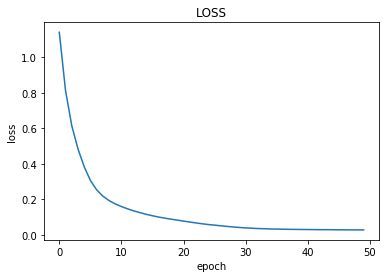

In [154]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

In [155]:
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

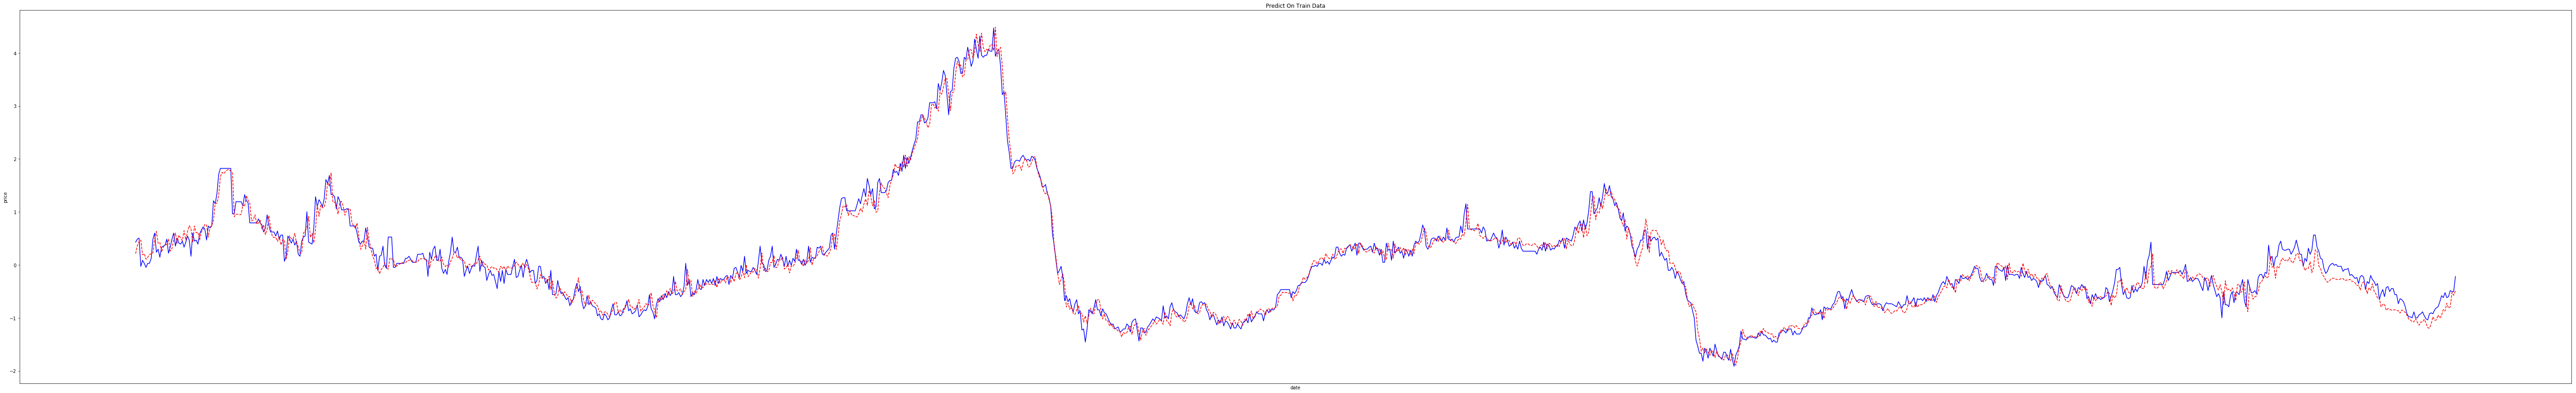

In [156]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

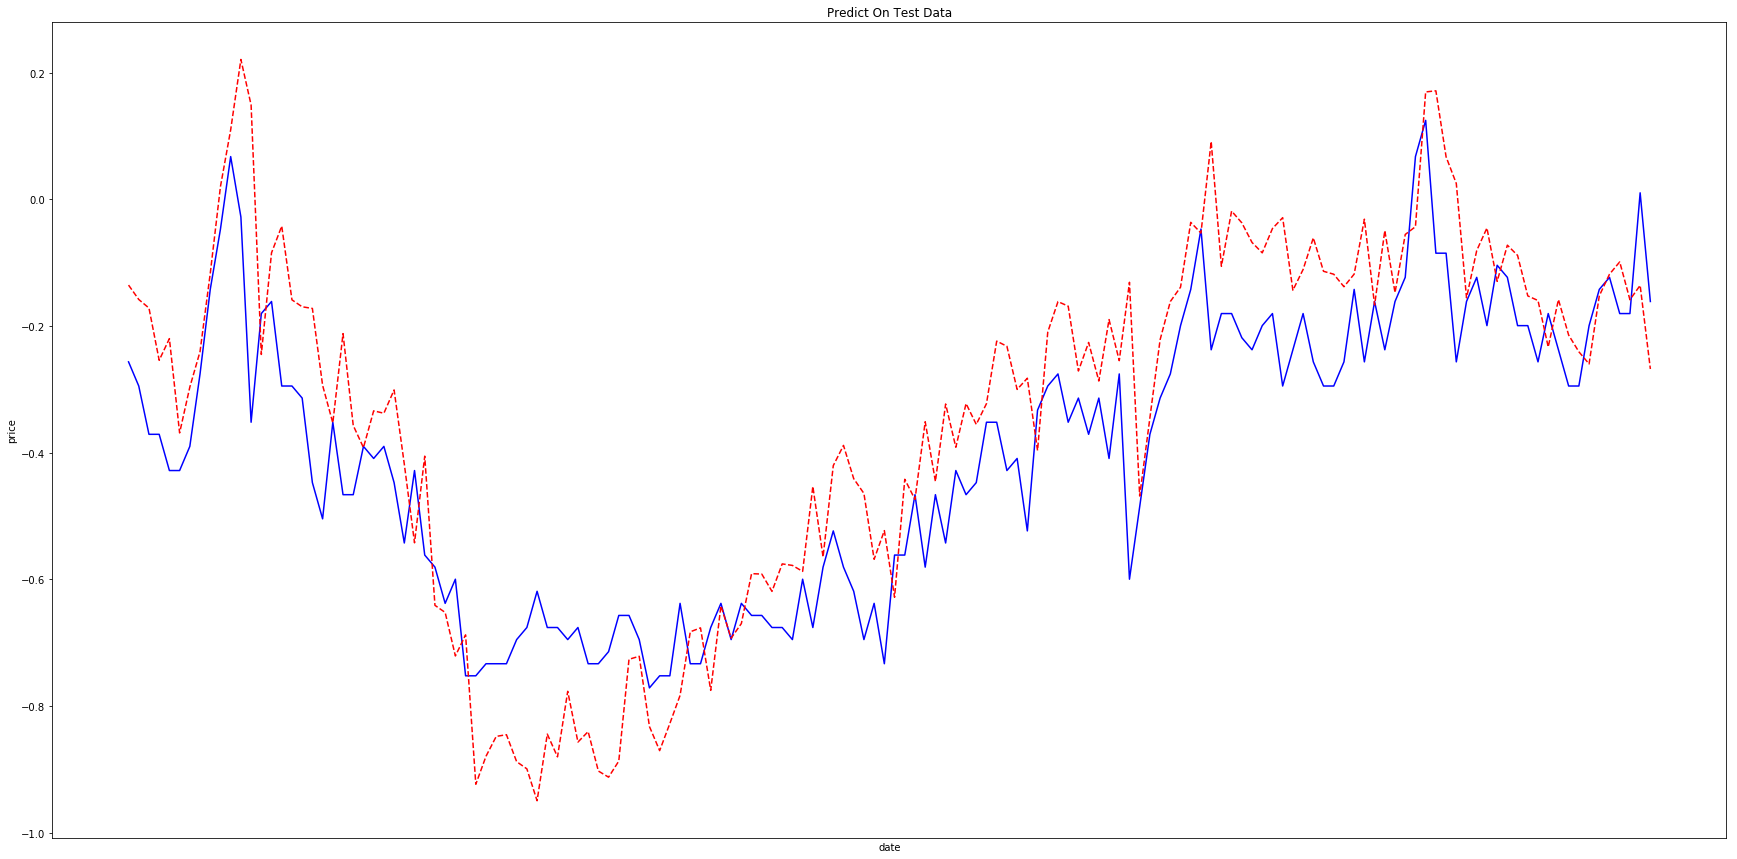

In [157]:
%matplotlib inline
plt.figure(figsize=(30, 15))
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

### 似乎还行

## 3.3 dropout

In [158]:
def build_network_3():
    network = Sequential()
    network.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dropout(0.5))
    network.add(Dense(8, activation='relu'))
    network.add(Dropout(0.5))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [159]:
model = build_network_3()

In [160]:
best_filepath = './model_data/nn2_best.hdf5'
#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')
save_bestModel =ModelCheckpoint(best_filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='auto')

In [161]:
history= model.fit(X_train, y_train, epochs=100, batch_size=50,verbose=1, shuffle=True,validation_split=0.1,callbacks=[save_bestModel])

Train on 1207 samples, validate on 135 samples
Epoch 1/100
1207/1207 [==============================] - 1s 507us/step - loss: 1.5058 - mean_absolute_error: 0.8661 - mean_squared_error: 1.5058 - val_loss: 0.1214 - val_mean_absolute_error: 0.2891 - val_mean_squared_error: 0.1214

Epoch 00001: val_loss improved from inf to 0.12140, saving model to ./model_data/nn2_best.hdf5
Epoch 2/100
1207/1207 [==============================] - 0s 30us/step - loss: 1.3001 - mean_absolute_error: 0.7915 - mean_squared_error: 1.3001 - val_loss: 0.1358 - val_mean_absolute_error: 0.3077 - val_mean_squared_error: 0.1358

Epoch 00002: val_loss did not improve from 0.12140
Epoch 3/100
1207/1207 [==============================] - 0s 30us/step - loss: 1.3218 - mean_absolute_error: 0.7983 - mean_squared_error: 1.3218 - val_loss: 0.1473 - val_mean_absolute_error: 0.3228 - val_mean_squared_error: 0.1473

Epoch 00003: val_loss did not improve from 0.12140
Epoch 4/100
1207/1207 [==============================] - 0s 33


Epoch 00029: val_loss did not improve from 0.12140
Epoch 30/100
1207/1207 [==============================] - 0s 32us/step - loss: 0.8059 - mean_absolute_error: 0.5775 - mean_squared_error: 0.8059 - val_loss: 0.1790 - val_mean_absolute_error: 0.3666 - val_mean_squared_error: 0.1790

Epoch 00030: val_loss did not improve from 0.12140
Epoch 31/100
1207/1207 [==============================] - 0s 29us/step - loss: 0.7376 - mean_absolute_error: 0.5626 - mean_squared_error: 0.7376 - val_loss: 0.1658 - val_mean_absolute_error: 0.3545 - val_mean_squared_error: 0.1658

Epoch 00031: val_loss did not improve from 0.12140
Epoch 32/100
1207/1207 [==============================] - 0s 36us/step - loss: 0.8314 - mean_absolute_error: 0.5914 - mean_squared_error: 0.8314 - val_loss: 0.1690 - val_mean_absolute_error: 0.3584 - val_mean_squared_error: 0.1690

Epoch 00032: val_loss did not improve from 0.12140
Epoch 33/100
1207/1207 [==============================] - 0s 32us/step - loss: 0.8162 - mean_absolu

1207/1207 [==============================] - 0s 31us/step - loss: 0.5869 - mean_absolute_error: 0.5168 - mean_squared_error: 0.5869 - val_loss: 0.0896 - val_mean_absolute_error: 0.2590 - val_mean_squared_error: 0.0896

Epoch 00058: val_loss did not improve from 0.08377
Epoch 59/100
1207/1207 [==============================] - 0s 30us/step - loss: 0.6343 - mean_absolute_error: 0.5188 - mean_squared_error: 0.6343 - val_loss: 0.0836 - val_mean_absolute_error: 0.2498 - val_mean_squared_error: 0.0836

Epoch 00059: val_loss improved from 0.08377 to 0.08362, saving model to ./model_data/nn2_best.hdf5
Epoch 60/100
1207/1207 [==============================] - 0s 35us/step - loss: 0.5889 - mean_absolute_error: 0.5052 - mean_squared_error: 0.5889 - val_loss: 0.0960 - val_mean_absolute_error: 0.2684 - val_mean_squared_error: 0.0960

Epoch 00060: val_loss did not improve from 0.08362
Epoch 61/100
1207/1207 [==============================] - 0s 36us/step - loss: 0.5643 - mean_absolute_error: 0.5083 

In [162]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

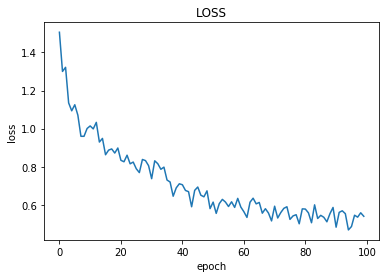

In [163]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

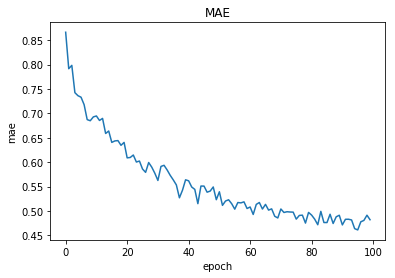

In [164]:
%matplotlib inline
plt.plot(range(len(mae_history)), mae_history)
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('MAE')
plt.show()

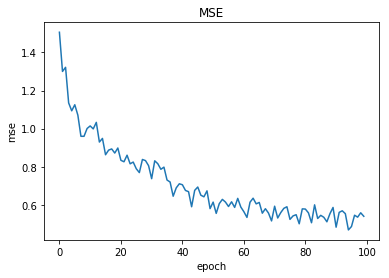

In [165]:
%matplotlib inline
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('MSE')
plt.show()

In [166]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

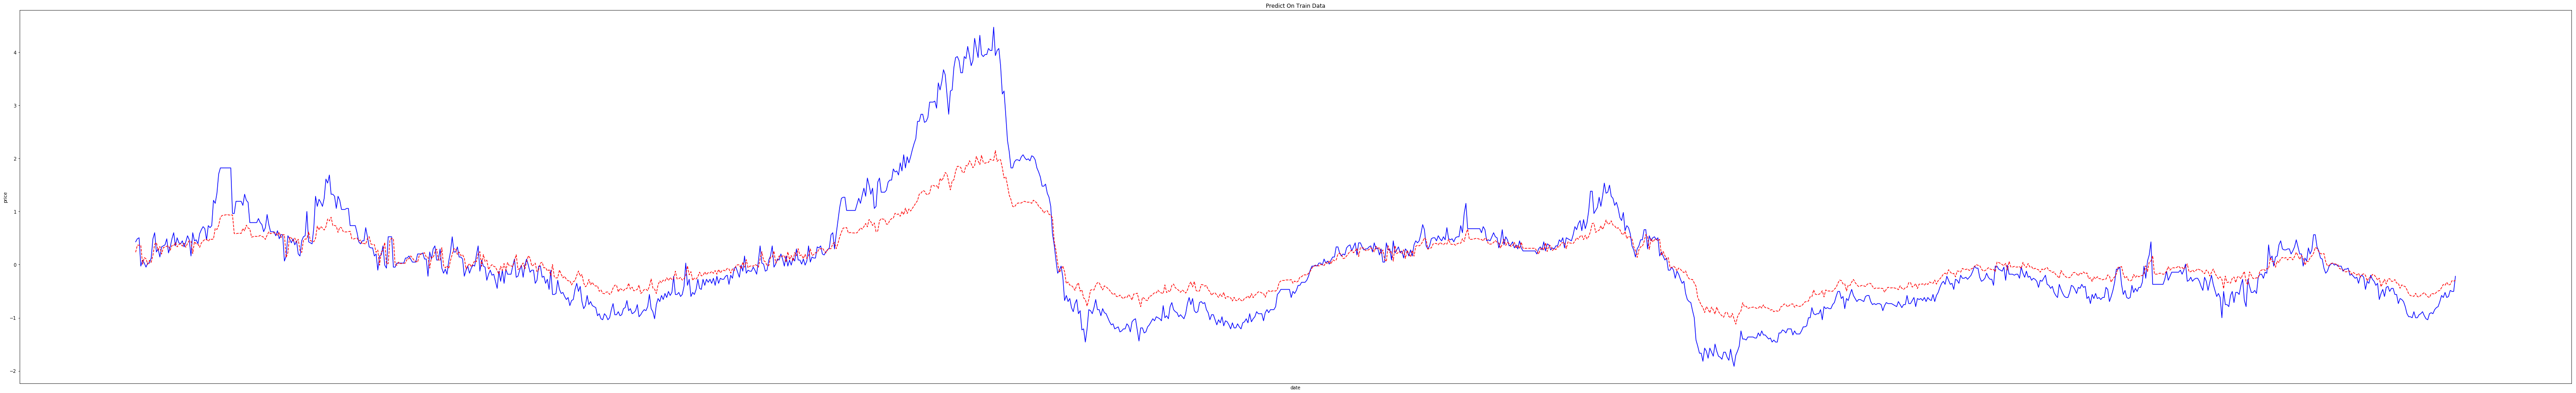

In [167]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

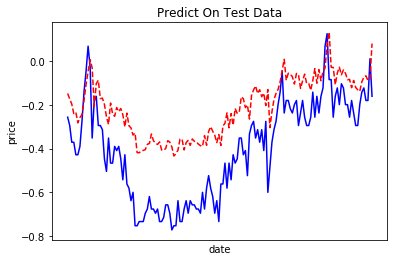

In [168]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

### 可以说未train好

## 3.3.2 dropout 增加训练轮次

In [52]:
best_filepath = './model_data/nn2_1_best.hdf5'
#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=2, mode='auto')
save_bestModel =ModelCheckpoint(best_filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='auto')

In [53]:
history= model.fit(X_train, y_train, epochs=500, shuffle=True,batch_size=50,verbose=1, validation_split=0.1,callbacks=[save_bestModel])

Train on 1207 samples, validate on 135 samples
Epoch 1/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.5157 - mean_absolute_error: 0.4791 - mean_squared_error: 0.5157 - val_loss: 0.0592 - val_mean_absolute_error: 0.1930 - val_mean_squared_error: 0.0592

Epoch 00001: val_loss improved from inf to 0.05921, saving model to ./model_data/nn2_1_best.hdf5
Epoch 2/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.5530 - mean_absolute_error: 0.4867 - mean_squared_error: 0.5530 - val_loss: 0.0565 - val_mean_absolute_error: 0.1875 - val_mean_squared_error: 0.0565

Epoch 00002: val_loss improved from 0.05921 to 0.05654, saving model to ./model_data/nn2_1_best.hdf5
Epoch 3/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.5539 - mean_absolute_error: 0.4837 - mean_squared_error: 0.5539 - val_loss: 0.0686 - val_mean_absolute_error: 0.2093 - val_mean_squared_error: 0.0686

Epoch 00003: val_loss did not improve from 0.05654
Epoch 4/500


Epoch 00028: val_loss did not improve from 0.05314
Epoch 29/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5368 - mean_absolute_error: 0.4802 - mean_squared_error: 0.5368 - val_loss: 0.0618 - val_mean_absolute_error: 0.2005 - val_mean_squared_error: 0.0618

Epoch 00029: val_loss did not improve from 0.05314
Epoch 30/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5212 - mean_absolute_error: 0.4717 - mean_squared_error: 0.5212 - val_loss: 0.0591 - val_mean_absolute_error: 0.1953 - val_mean_squared_error: 0.0591

Epoch 00030: val_loss did not improve from 0.05314
Epoch 31/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.5586 - mean_absolute_error: 0.4842 - mean_squared_error: 0.5586 - val_loss: 0.0621 - val_mean_absolute_error: 0.2006 - val_mean_squared_error: 0.0621

Epoch 00031: val_loss did not improve from 0.05314
Epoch 32/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5381 - mean_absolu


Epoch 00057: val_loss did not improve from 0.05168
Epoch 58/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.5035 - mean_absolute_error: 0.4595 - mean_squared_error: 0.5035 - val_loss: 0.0687 - val_mean_absolute_error: 0.2143 - val_mean_squared_error: 0.0687

Epoch 00058: val_loss did not improve from 0.05168
Epoch 59/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.5261 - mean_absolute_error: 0.4631 - mean_squared_error: 0.5261 - val_loss: 0.0697 - val_mean_absolute_error: 0.2159 - val_mean_squared_error: 0.0697

Epoch 00059: val_loss did not improve from 0.05168
Epoch 60/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.5461 - mean_absolute_error: 0.4643 - mean_squared_error: 0.5461 - val_loss: 0.0647 - val_mean_absolute_error: 0.2069 - val_mean_squared_error: 0.0647

Epoch 00060: val_loss did not improve from 0.05168
Epoch 61/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5377 - mean_absolu


Epoch 00086: val_loss did not improve from 0.05168
Epoch 87/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4905 - mean_absolute_error: 0.4603 - mean_squared_error: 0.4905 - val_loss: 0.0656 - val_mean_absolute_error: 0.2105 - val_mean_squared_error: 0.0656

Epoch 00087: val_loss did not improve from 0.05168
Epoch 88/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5264 - mean_absolute_error: 0.4629 - mean_squared_error: 0.5264 - val_loss: 0.0739 - val_mean_absolute_error: 0.2254 - val_mean_squared_error: 0.0739

Epoch 00088: val_loss did not improve from 0.05168
Epoch 89/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.4273 - mean_absolute_error: 0.4292 - mean_squared_error: 0.4273 - val_loss: 0.0734 - val_mean_absolute_error: 0.2254 - val_mean_squared_error: 0.0734

Epoch 00089: val_loss did not improve from 0.05168
Epoch 90/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.5437 - mean_absolu


Epoch 00115: val_loss did not improve from 0.05168
Epoch 116/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.4729 - mean_absolute_error: 0.4602 - mean_squared_error: 0.4729 - val_loss: 0.0689 - val_mean_absolute_error: 0.2142 - val_mean_squared_error: 0.0689

Epoch 00116: val_loss did not improve from 0.05168
Epoch 117/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.5218 - mean_absolute_error: 0.4703 - mean_squared_error: 0.5218 - val_loss: 0.0635 - val_mean_absolute_error: 0.2051 - val_mean_squared_error: 0.0635

Epoch 00117: val_loss did not improve from 0.05168
Epoch 118/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.4832 - mean_absolute_error: 0.4592 - mean_squared_error: 0.4832 - val_loss: 0.0692 - val_mean_absolute_error: 0.2141 - val_mean_squared_error: 0.0692

Epoch 00118: val_loss did not improve from 0.05168
Epoch 119/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4927 - mean_ab


Epoch 00144: val_loss did not improve from 0.05168
Epoch 145/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.4433 - mean_absolute_error: 0.4228 - mean_squared_error: 0.4433 - val_loss: 0.0657 - val_mean_absolute_error: 0.2055 - val_mean_squared_error: 0.0657

Epoch 00145: val_loss did not improve from 0.05168
Epoch 146/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5101 - mean_absolute_error: 0.4594 - mean_squared_error: 0.5101 - val_loss: 0.0708 - val_mean_absolute_error: 0.2146 - val_mean_squared_error: 0.0708

Epoch 00146: val_loss did not improve from 0.05168
Epoch 147/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4529 - mean_absolute_error: 0.4411 - mean_squared_error: 0.4529 - val_loss: 0.0691 - val_mean_absolute_error: 0.2123 - val_mean_squared_error: 0.0691

Epoch 00147: val_loss did not improve from 0.05168
Epoch 148/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4987 - mean_ab


Epoch 00173: val_loss did not improve from 0.05168
Epoch 174/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4896 - mean_absolute_error: 0.4413 - mean_squared_error: 0.4896 - val_loss: 0.0802 - val_mean_absolute_error: 0.2315 - val_mean_squared_error: 0.0802

Epoch 00174: val_loss did not improve from 0.05168
Epoch 175/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.4289 - mean_absolute_error: 0.4377 - mean_squared_error: 0.4289 - val_loss: 0.0757 - val_mean_absolute_error: 0.2243 - val_mean_squared_error: 0.0757

Epoch 00175: val_loss did not improve from 0.05168
Epoch 176/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.4896 - mean_absolute_error: 0.4469 - mean_squared_error: 0.4896 - val_loss: 0.0837 - val_mean_absolute_error: 0.2366 - val_mean_squared_error: 0.0837

Epoch 00176: val_loss did not improve from 0.05168
Epoch 177/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5583 - mean_ab


Epoch 00202: val_loss did not improve from 0.05168
Epoch 203/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4725 - mean_absolute_error: 0.4538 - mean_squared_error: 0.4725 - val_loss: 0.0642 - val_mean_absolute_error: 0.2034 - val_mean_squared_error: 0.0642

Epoch 00203: val_loss did not improve from 0.05168
Epoch 204/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4738 - mean_absolute_error: 0.4400 - mean_squared_error: 0.4738 - val_loss: 0.0646 - val_mean_absolute_error: 0.2034 - val_mean_squared_error: 0.0646

Epoch 00204: val_loss did not improve from 0.05168
Epoch 205/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4545 - mean_absolute_error: 0.4380 - mean_squared_error: 0.4545 - val_loss: 0.0648 - val_mean_absolute_error: 0.2045 - val_mean_squared_error: 0.0648

Epoch 00205: val_loss did not improve from 0.05168
Epoch 206/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4791 - mean_ab


Epoch 00231: val_loss did not improve from 0.05168
Epoch 232/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.5155 - mean_absolute_error: 0.4678 - mean_squared_error: 0.5155 - val_loss: 0.0600 - val_mean_absolute_error: 0.1973 - val_mean_squared_error: 0.0600

Epoch 00232: val_loss did not improve from 0.05168
Epoch 233/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.5417 - mean_absolute_error: 0.4662 - mean_squared_error: 0.5417 - val_loss: 0.0711 - val_mean_absolute_error: 0.2173 - val_mean_squared_error: 0.0711

Epoch 00233: val_loss did not improve from 0.05168
Epoch 234/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4710 - mean_absolute_error: 0.4446 - mean_squared_error: 0.4710 - val_loss: 0.0786 - val_mean_absolute_error: 0.2295 - val_mean_squared_error: 0.0786

Epoch 00234: val_loss did not improve from 0.05168
Epoch 235/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4621 - mean_ab


Epoch 00260: val_loss did not improve from 0.05168
Epoch 261/500
1207/1207 [==============================] - 0s 23us/step - loss: 0.4589 - mean_absolute_error: 0.4395 - mean_squared_error: 0.4589 - val_loss: 0.0740 - val_mean_absolute_error: 0.2199 - val_mean_squared_error: 0.0740

Epoch 00261: val_loss did not improve from 0.05168
Epoch 262/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4939 - mean_absolute_error: 0.4573 - mean_squared_error: 0.4939 - val_loss: 0.0702 - val_mean_absolute_error: 0.2140 - val_mean_squared_error: 0.0702

Epoch 00262: val_loss did not improve from 0.05168
Epoch 263/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4547 - mean_absolute_error: 0.4479 - mean_squared_error: 0.4547 - val_loss: 0.0745 - val_mean_absolute_error: 0.2214 - val_mean_squared_error: 0.0745

Epoch 00263: val_loss did not improve from 0.05168
Epoch 264/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4284 - mean_ab


Epoch 00289: val_loss did not improve from 0.05168
Epoch 290/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4865 - mean_absolute_error: 0.4438 - mean_squared_error: 0.4865 - val_loss: 0.0771 - val_mean_absolute_error: 0.2266 - val_mean_squared_error: 0.0771

Epoch 00290: val_loss did not improve from 0.05168
Epoch 291/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.4832 - mean_absolute_error: 0.4459 - mean_squared_error: 0.4832 - val_loss: 0.0745 - val_mean_absolute_error: 0.2227 - val_mean_squared_error: 0.0745

Epoch 00291: val_loss did not improve from 0.05168
Epoch 292/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.4870 - mean_absolute_error: 0.4456 - mean_squared_error: 0.4870 - val_loss: 0.0749 - val_mean_absolute_error: 0.2227 - val_mean_squared_error: 0.0749

Epoch 00292: val_loss did not improve from 0.05168
Epoch 293/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.5461 - mean_ab


Epoch 00318: val_loss did not improve from 0.05168
Epoch 319/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.5170 - mean_absolute_error: 0.4543 - mean_squared_error: 0.5170 - val_loss: 0.0744 - val_mean_absolute_error: 0.2187 - val_mean_squared_error: 0.0744

Epoch 00319: val_loss did not improve from 0.05168
Epoch 320/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4758 - mean_absolute_error: 0.4548 - mean_squared_error: 0.4758 - val_loss: 0.0645 - val_mean_absolute_error: 0.2011 - val_mean_squared_error: 0.0645

Epoch 00320: val_loss did not improve from 0.05168
Epoch 321/500
1207/1207 [==============================] - 0s 28us/step - loss: 0.5260 - mean_absolute_error: 0.4579 - mean_squared_error: 0.5260 - val_loss: 0.0693 - val_mean_absolute_error: 0.2098 - val_mean_squared_error: 0.0693

Epoch 00321: val_loss did not improve from 0.05168
Epoch 322/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.4504 - mean_ab


Epoch 00347: val_loss did not improve from 0.05168
Epoch 348/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4772 - mean_absolute_error: 0.4423 - mean_squared_error: 0.4772 - val_loss: 0.0694 - val_mean_absolute_error: 0.2127 - val_mean_squared_error: 0.0694

Epoch 00348: val_loss did not improve from 0.05168
Epoch 349/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4955 - mean_absolute_error: 0.4493 - mean_squared_error: 0.4955 - val_loss: 0.0646 - val_mean_absolute_error: 0.2044 - val_mean_squared_error: 0.0646

Epoch 00349: val_loss did not improve from 0.05168
Epoch 350/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.5159 - mean_absolute_error: 0.4570 - mean_squared_error: 0.5159 - val_loss: 0.0715 - val_mean_absolute_error: 0.2162 - val_mean_squared_error: 0.0715

Epoch 00350: val_loss did not improve from 0.05168
Epoch 351/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.4899 - mean_ab


Epoch 00376: val_loss did not improve from 0.05168
Epoch 377/500
1207/1207 [==============================] - 0s 22us/step - loss: 0.4994 - mean_absolute_error: 0.4477 - mean_squared_error: 0.4994 - val_loss: 0.0604 - val_mean_absolute_error: 0.1975 - val_mean_squared_error: 0.0604

Epoch 00377: val_loss did not improve from 0.05168
Epoch 378/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5080 - mean_absolute_error: 0.4543 - mean_squared_error: 0.5080 - val_loss: 0.0655 - val_mean_absolute_error: 0.2056 - val_mean_squared_error: 0.0655

Epoch 00378: val_loss did not improve from 0.05168
Epoch 379/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.4902 - mean_absolute_error: 0.4452 - mean_squared_error: 0.4902 - val_loss: 0.0787 - val_mean_absolute_error: 0.2276 - val_mean_squared_error: 0.0787

Epoch 00379: val_loss did not improve from 0.05168
Epoch 380/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.5026 - mean_ab


Epoch 00405: val_loss did not improve from 0.05168
Epoch 406/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.4800 - mean_absolute_error: 0.4509 - mean_squared_error: 0.4800 - val_loss: 0.0722 - val_mean_absolute_error: 0.2175 - val_mean_squared_error: 0.0722

Epoch 00406: val_loss did not improve from 0.05168
Epoch 407/500
1207/1207 [==============================] - 0s 25us/step - loss: 0.5168 - mean_absolute_error: 0.4578 - mean_squared_error: 0.5168 - val_loss: 0.0774 - val_mean_absolute_error: 0.2258 - val_mean_squared_error: 0.0774

Epoch 00407: val_loss did not improve from 0.05168
Epoch 408/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4816 - mean_absolute_error: 0.4470 - mean_squared_error: 0.4816 - val_loss: 0.0703 - val_mean_absolute_error: 0.2144 - val_mean_squared_error: 0.0703

Epoch 00408: val_loss did not improve from 0.05168
Epoch 409/500
1207/1207 [==============================] - 0s 29us/step - loss: 0.5008 - mean_ab


Epoch 00434: val_loss did not improve from 0.05168
Epoch 435/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4642 - mean_absolute_error: 0.4393 - mean_squared_error: 0.4642 - val_loss: 0.0727 - val_mean_absolute_error: 0.2178 - val_mean_squared_error: 0.0727

Epoch 00435: val_loss did not improve from 0.05168
Epoch 436/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.4838 - mean_absolute_error: 0.4469 - mean_squared_error: 0.4838 - val_loss: 0.0685 - val_mean_absolute_error: 0.2098 - val_mean_squared_error: 0.0685

Epoch 00436: val_loss did not improve from 0.05168
Epoch 437/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5226 - mean_absolute_error: 0.4666 - mean_squared_error: 0.5226 - val_loss: 0.0816 - val_mean_absolute_error: 0.2314 - val_mean_squared_error: 0.0816

Epoch 00437: val_loss did not improve from 0.05168
Epoch 438/500
1207/1207 [==============================] - 0s 24us/step - loss: 0.4762 - mean_ab


Epoch 00463: val_loss did not improve from 0.05168
Epoch 464/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.5059 - mean_absolute_error: 0.4585 - mean_squared_error: 0.5059 - val_loss: 0.0599 - val_mean_absolute_error: 0.1960 - val_mean_squared_error: 0.0599

Epoch 00464: val_loss did not improve from 0.05168
Epoch 465/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4949 - mean_absolute_error: 0.4544 - mean_squared_error: 0.4949 - val_loss: 0.0625 - val_mean_absolute_error: 0.2007 - val_mean_squared_error: 0.0625

Epoch 00465: val_loss did not improve from 0.05168
Epoch 466/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.4745 - mean_absolute_error: 0.4408 - mean_squared_error: 0.4745 - val_loss: 0.0688 - val_mean_absolute_error: 0.2117 - val_mean_squared_error: 0.0688

Epoch 00466: val_loss did not improve from 0.05168
Epoch 467/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4857 - mean_ab


Epoch 00492: val_loss did not improve from 0.05168
Epoch 493/500
1207/1207 [==============================] - 0s 26us/step - loss: 0.4436 - mean_absolute_error: 0.4256 - mean_squared_error: 0.4436 - val_loss: 0.0615 - val_mean_absolute_error: 0.1991 - val_mean_squared_error: 0.0615

Epoch 00493: val_loss did not improve from 0.05168
Epoch 494/500
1207/1207 [==============================] - 0s 27us/step - loss: 0.5223 - mean_absolute_error: 0.4598 - mean_squared_error: 0.5223 - val_loss: 0.0721 - val_mean_absolute_error: 0.2178 - val_mean_squared_error: 0.0721

Epoch 00494: val_loss did not improve from 0.05168
Epoch 495/500
1207/1207 [==============================] - 0s 31us/step - loss: 0.4417 - mean_absolute_error: 0.4316 - mean_squared_error: 0.4417 - val_loss: 0.0678 - val_mean_absolute_error: 0.2103 - val_mean_squared_error: 0.0678

Epoch 00495: val_loss did not improve from 0.05168
Epoch 496/500
1207/1207 [==============================] - 0s 30us/step - loss: 0.4727 - mean_ab

In [54]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

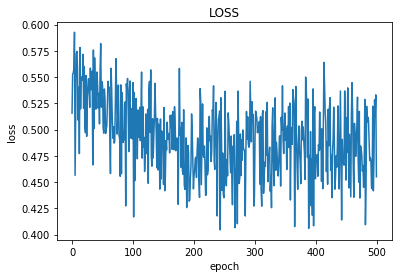

In [55]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

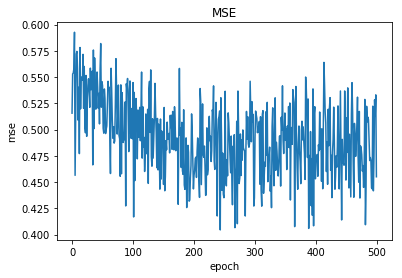

In [56]:
%matplotlib inline
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('MSE')
plt.show()

In [57]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

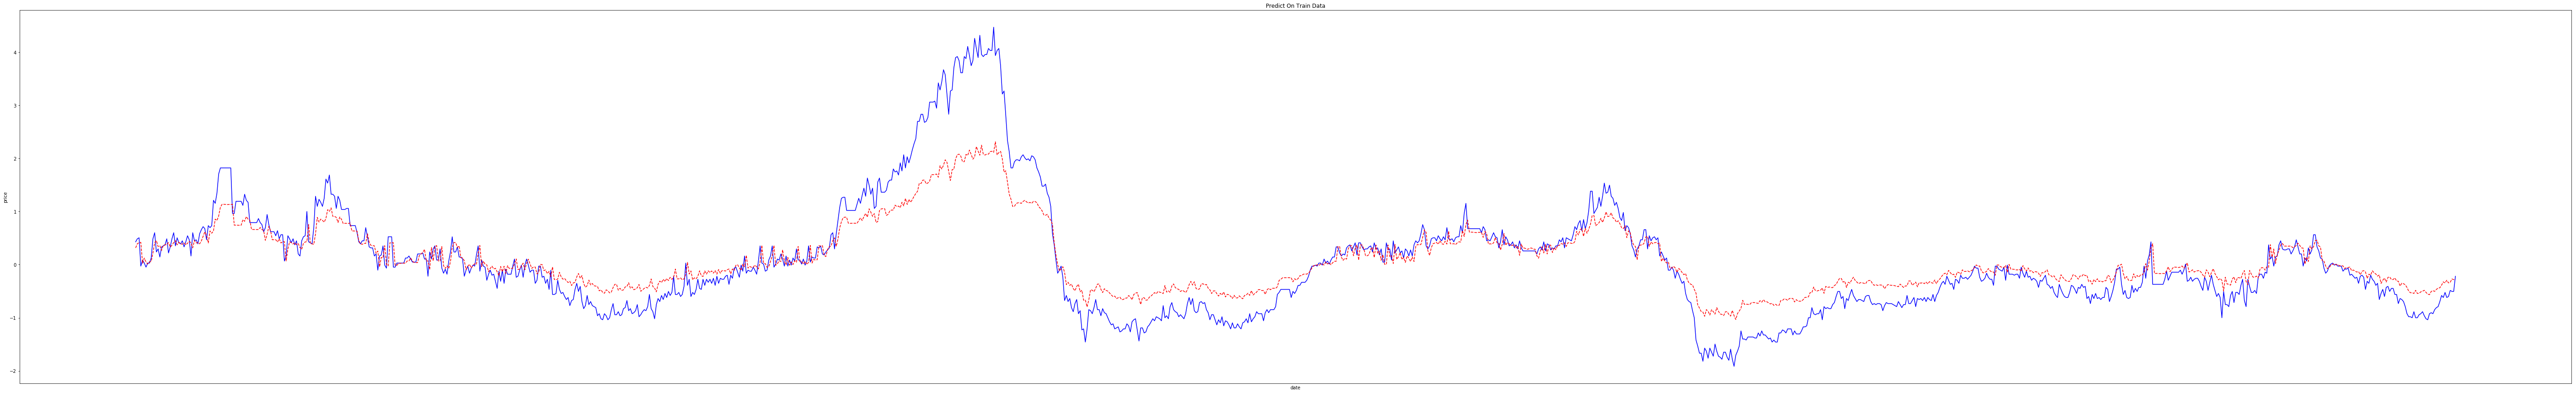

In [58]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

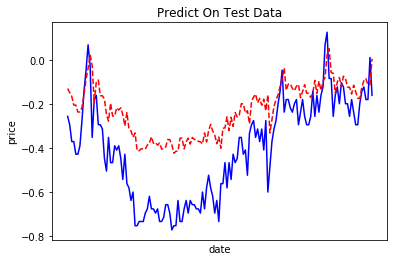

In [59]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

## 3.3.3 更改模型参数

In [1]:
def build_network_4():
    network = Sequential()
    network.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
    network.add(Dropout(0.4))
    network.add(Dense(8, activation='relu'))
    network.add(Dropout(0.1))
    network.add(Dense(1))
    network.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return network

In [2]:
model = build_network_4()

NameError: name 'Sequential' is not defined

In [231]:
from keras.callbacks import TensorBoard
best_weights_filepath = './model_data/nn4_best.hdf5'
tensorboad = TensorBoard(log_dir='./model_data/log')
early_stopping = EarlyStopping(
    monitor='val_loss', patience=80, verbose=2, mode='auto')
save_bestModel = ModelCheckpoint(
    best_weights_filepath,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='auto')

In [232]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    shuffle=True,
    batch_size=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[save_bestModel,early_stopping,tensorboad])

Train on 1207 samples, validate on 135 samples
Epoch 1/500
1207/1207 [==============================] - 0s 258us/step - loss: 1.7008 - mean_absolute_error: 0.9617 - mean_squared_error: 1.7008 - val_loss: 0.5312 - val_mean_absolute_error: 0.6051 - val_mean_squared_error: 0.5312

Epoch 00001: val_loss improved from inf to 0.53117, saving model to ./model_data/nn4_best.hdf5
Epoch 2/500
1207/1207 [==============================] - 0s 27us/step - loss: 1.3742 - mean_absolute_error: 0.8316 - mean_squared_error: 1.3742 - val_loss: 0.3318 - val_mean_absolute_error: 0.4934 - val_mean_squared_error: 0.3318

Epoch 00002: val_loss improved from 0.53117 to 0.33182, saving model to ./model_data/nn4_best.hdf5
Epoch 3/500
1207/1207 [==============================] - 0s 36us/step - loss: 1.0865 - mean_absolute_error: 0.7102 - mean_squared_error: 1.0865 - val_loss: 0.2107 - val_mean_absolute_error: 0.4012 - val_mean_squared_error: 0.2107

Epoch 00003: val_loss improved from 0.33182 to 0.21070, saving mo

1207/1207 [==============================] - 0s 32us/step - loss: 0.2474 - mean_absolute_error: 0.3402 - mean_squared_error: 0.2474 - val_loss: 0.0338 - val_mean_absolute_error: 0.1468 - val_mean_squared_error: 0.0338

Epoch 00026: val_loss improved from 0.03471 to 0.03380, saving model to ./model_data/nn4_best.hdf5
Epoch 27/500
1207/1207 [==============================] - 0s 36us/step - loss: 0.2104 - mean_absolute_error: 0.3174 - mean_squared_error: 0.2104 - val_loss: 0.0333 - val_mean_absolute_error: 0.1462 - val_mean_squared_error: 0.0333

Epoch 00027: val_loss improved from 0.03380 to 0.03334, saving model to ./model_data/nn4_best.hdf5
Epoch 28/500
1207/1207 [==============================] - 0s 39us/step - loss: 0.2055 - mean_absolute_error: 0.3146 - mean_squared_error: 0.2055 - val_loss: 0.0339 - val_mean_absolute_error: 0.1488 - val_mean_squared_error: 0.0339

Epoch 00028: val_loss did not improve from 0.03334
Epoch 29/500
1207/1207 [==============================] - 0s 40us/st

1207/1207 [==============================] - 0s 31us/step - loss: 0.1301 - mean_absolute_error: 0.2470 - mean_squared_error: 0.1301 - val_loss: 0.0235 - val_mean_absolute_error: 0.1179 - val_mean_squared_error: 0.0235

Epoch 00081: val_loss did not improve from 0.02195
Epoch 82/500
1207/1207 [==============================] - 0s 36us/step - loss: 0.1343 - mean_absolute_error: 0.2458 - mean_squared_error: 0.1343 - val_loss: 0.0235 - val_mean_absolute_error: 0.1180 - val_mean_squared_error: 0.0235

Epoch 00082: val_loss did not improve from 0.02195
Epoch 83/500
1207/1207 [==============================] - 0s 34us/step - loss: 0.1513 - mean_absolute_error: 0.2468 - mean_squared_error: 0.1513 - val_loss: 0.0234 - val_mean_absolute_error: 0.1189 - val_mean_squared_error: 0.0234

Epoch 00083: val_loss did not improve from 0.02195
Epoch 84/500
1207/1207 [==============================] - 0s 110us/step - loss: 0.1317 - mean_absolute_error: 0.2431 - mean_squared_error: 0.1317 - val_loss: 0.0224


Epoch 00137: val_loss did not improve from 0.02094
Epoch 138/500
1207/1207 [==============================] - 0s 34us/step - loss: 0.1340 - mean_absolute_error: 0.2247 - mean_squared_error: 0.1340 - val_loss: 0.0217 - val_mean_absolute_error: 0.1125 - val_mean_squared_error: 0.0217

Epoch 00138: val_loss did not improve from 0.02094
Epoch 139/500
1207/1207 [==============================] - 0s 40us/step - loss: 0.1271 - mean_absolute_error: 0.2263 - mean_squared_error: 0.1271 - val_loss: 0.0227 - val_mean_absolute_error: 0.1164 - val_mean_squared_error: 0.0227

Epoch 00139: val_loss did not improve from 0.02094
Epoch 140/500
1207/1207 [==============================] - 0s 36us/step - loss: 0.1193 - mean_absolute_error: 0.2243 - mean_squared_error: 0.1193 - val_loss: 0.0229 - val_mean_absolute_error: 0.1168 - val_mean_squared_error: 0.0229

Epoch 00140: val_loss did not improve from 0.02094
Epoch 141/500
1207/1207 [==============================] - 0s 41us/step - loss: 0.1661 - mean_ab


Epoch 00166: val_loss did not improve from 0.02094
Epoch 167/500
1207/1207 [==============================] - 0s 32us/step - loss: 0.1105 - mean_absolute_error: 0.2159 - mean_squared_error: 0.1105 - val_loss: 0.0240 - val_mean_absolute_error: 0.1214 - val_mean_squared_error: 0.0240

Epoch 00167: val_loss did not improve from 0.02094
Epoch 168/500
1207/1207 [==============================] - 0s 40us/step - loss: 0.1125 - mean_absolute_error: 0.2188 - mean_squared_error: 0.1125 - val_loss: 0.0234 - val_mean_absolute_error: 0.1196 - val_mean_squared_error: 0.0234

Epoch 00168: val_loss did not improve from 0.02094
Epoch 169/500
1207/1207 [==============================] - 0s 36us/step - loss: 0.1162 - mean_absolute_error: 0.2139 - mean_squared_error: 0.1162 - val_loss: 0.0238 - val_mean_absolute_error: 0.1209 - val_mean_squared_error: 0.0238

Epoch 00169: val_loss did not improve from 0.02094
Epoch 170/500
1207/1207 [==============================] - 0s 33us/step - loss: 0.1175 - mean_ab


Epoch 00195: val_loss did not improve from 0.02094
Epoch 196/500
1207/1207 [==============================] - 0s 69us/step - loss: 0.1194 - mean_absolute_error: 0.2155 - mean_squared_error: 0.1194 - val_loss: 0.0234 - val_mean_absolute_error: 0.1184 - val_mean_squared_error: 0.0234

Epoch 00196: val_loss did not improve from 0.02094
Epoch 197/500
1207/1207 [==============================] - 0s 54us/step - loss: 0.0931 - mean_absolute_error: 0.2110 - mean_squared_error: 0.0931 - val_loss: 0.0246 - val_mean_absolute_error: 0.1235 - val_mean_squared_error: 0.0246

Epoch 00197: val_loss did not improve from 0.02094
Epoch 198/500
1207/1207 [==============================] - 0s 33us/step - loss: 0.1055 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1055 - val_loss: 0.0253 - val_mean_absolute_error: 0.1235 - val_mean_squared_error: 0.0253

Epoch 00198: val_loss did not improve from 0.02094
Epoch 199/500
1207/1207 [==============================] - 0s 33us/step - loss: 0.1286 - mean_ab

In [235]:
loss_history = history.history['loss']
mae_history = history.history['mean_absolute_error']
mse_history = history.history['mean_squared_error']

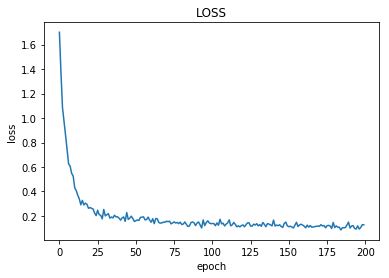

In [236]:
%matplotlib inline
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('LOSS')
plt.show()

In [237]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

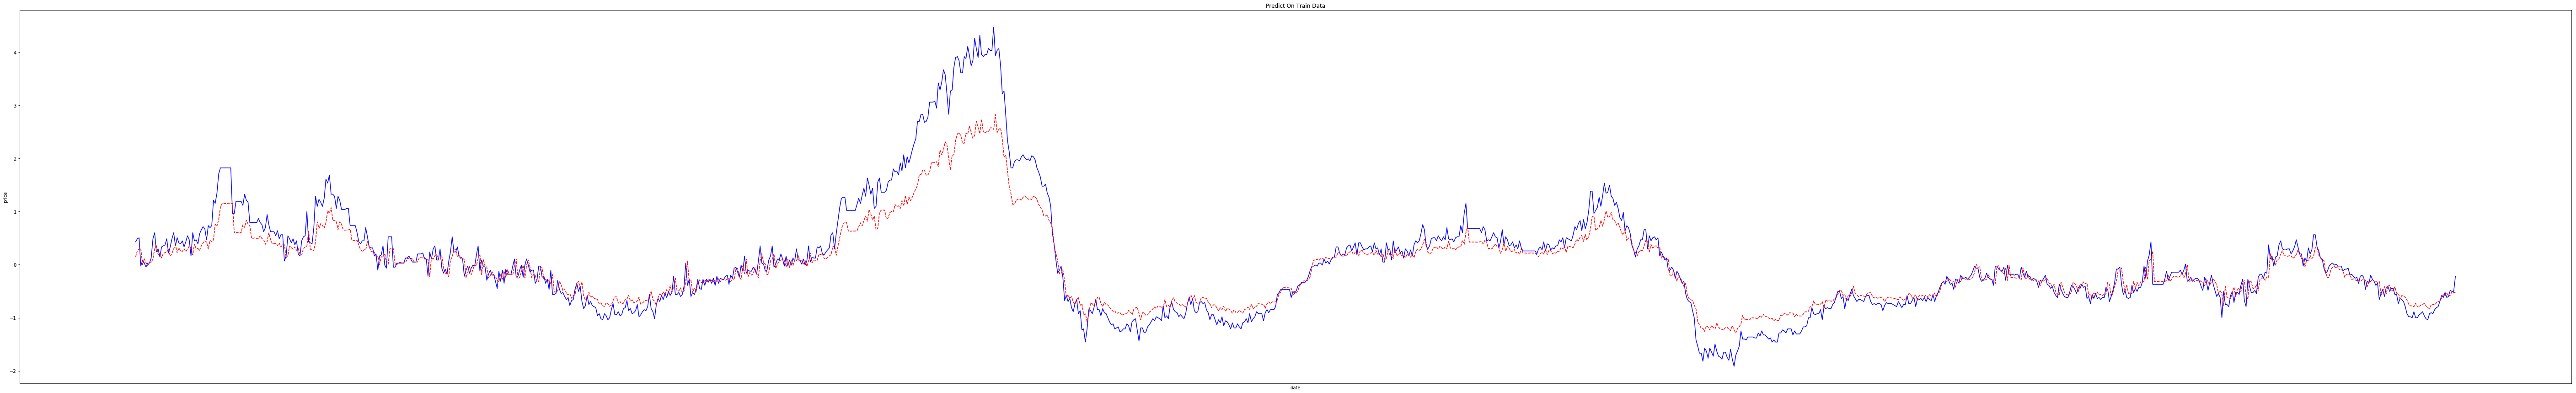

In [238]:
%matplotlib inline
plt.figure(figsize=(100, 15))
plt.plot(range(len(X_train)), y_train,'b')
plt.plot(range(len(X_train)), y_train_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Train Data')
plt.show()

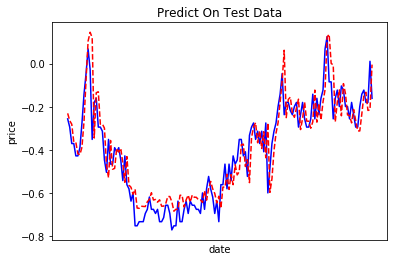

In [239]:
%matplotlib inline
plt.plot(range(len(X_test)), y_test,'b')
plt.plot(range(len(X_test)), y_test_pred, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict On Test Data')
plt.show()

In [244]:
loss_value, mae_value,mse_value = model.evaluate(x=X_test, y=y_test,verbose=1) 

150/150 [==============================] - 0s 53us/step


In [245]:
loss_value

0.01045577134937048

In [246]:
mae_value

0.07774106452862421

In [247]:
mse_value

0.01045577134937048

# 价格预测

In [34]:
from keras.models import load_model
model = load_model('./model_data/nn4_best.hdf5')

In [35]:
loss_value, mae_value,mse_value = model.evaluate(x=X_test, y=y_test,verbose=1) 

150/150 [==============================] - 0s 386us/step


In [36]:
loss_value

0.010475299097597599

In [39]:
y_test_pred = model.predict(X_test)

In [40]:
X_pr = scaler_X.inverse_transform(X_test)

In [41]:
y_predict = scaler_Y.inverse_transform(y_test_pred)
y_true = scaler_Y.inverse_transform(y_test)

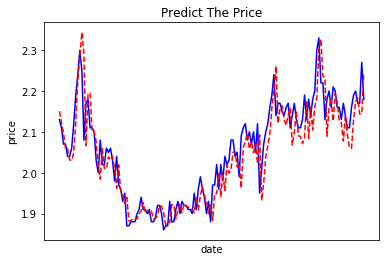

In [45]:
%matplotlib inline
plt.plot(range(len(X_pr)), y_true,'b')
plt.plot(range(len(X_pr)), y_predict, 'r--')
plt.xlabel('date')
plt.xticks([])
plt.ylabel('price')
plt.title('Predict The Price')
plt.show()